In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import folium 
import plotly.express as px 
import osmnx as ox 
import networkx as nx 
from ortools.constraint_solver import pywrapcp 
from ortools.constraint_solver import routing_enums_pb2

In [2]:

city = "Nairobi"

# Restructured data for hospitals
hospitals = [
    {'City': 'Nairobi', 'Facility': 'Kenyatta University Teaching, Referral and Research Hospital', 'Latitude': -1.1774485790025642, 'Longitude': 36.91542370190177},
    {'City': 'Nairobi', 'Facility': 'Juja Road Hospital - Pangani', 'Latitude': -1.2680348377689903, 'Longitude': 36.838052719693735},
    {'City': 'Nairobi', 'Facility': 'MP Shah Hospital', 'Latitude': -1.2634399950904192, 'Longitude': 36.81214011479204},
    {'City': 'Nairobi', 'Facility': 'Guru Nanak Ramgarhia Sikh Hospital', 'Latitude': -1.2694019711454219, 'Longitude': 36.83249311479203},
    {'City': 'Nairobi', 'Facility': 'Avenue Hospital Nairobi', 'Latitude': -1.2643867559801263, 'Longitude': 36.81791959944912},
    {'City': 'Nairobi', 'Facility': 'Coptic Hospital-Main Hospital', 'Latitude': -1.297372573961115, 'Longitude': 36.797652614792014},
    {'City': 'Nairobi', 'Facility': 'THE NAIROBI WEST HOSPITAL', 'Latitude': -1.3065158916286777, 'Longitude': 36.825902457396005},
    {'City': 'Nairobi', 'Facility': 'Aga Khan University Hospital', 'Latitude': -1.2621481426039023, 'Longitude': 36.82381419972456},
    {'City': 'Nairobi', 'Facility': 'Kenyatta National Hospital', 'Latitude': -1.3020512957378605, 'Longitude': 36.80766429972455},
    {'City': 'Nairobi', 'Facility': 'Pumwani Maternity Hospital', 'Latitude': -1.280535486126181, 'Longitude': 36.84545584205309},
    {'City': 'Nairobi', 'Facility': 'Mama Lucy Kibaki Hospital', 'Latitude': -1.2739446428972168, 'Longitude': 36.89896914205308},
    {'City': 'Nairobi', 'Facility': 'Langata Hospital', 'Latitude': -1.327670792357127, 'Longitude': 36.78926854205308},
    {'City': 'Nairobi', 'Facility': 'The Nairobi Women\'s Hospital', 'Latitude': -1.2934860257680032, 'Longitude': 36.79609665739601},
    {'City': 'Nairobi', 'Facility': 'The Nairobi Hospital', 'Latitude': -1.2950305839789098, 'Longitude': 36.80390724980866},
    {'City': 'Nairobi', 'Facility': 'AAR Hospital', 'Latitude': -1.2375046786700936, 'Longitude': 36.8444370994491},
]

# Restructured data for chief places
chief_places = [
    {'City': 'Nairobi', 'Facility': 'Umoja Chiefs Camp', 'Latitude': -1.2823173958444931, 'Longitude': 36.9006500667569},
    {'City': 'Nairobi', 'Facility': 'Kahawa West Chiefs Camp', 'Latitude': -1.1848926273502338, 'Longitude': 36.90167342612349},
    {'City': 'Nairobi', 'Facility': 'Kasarani Chiefs Camp', 'Latitude': -1.2238072140456207, 'Longitude': 36.90248566532997},
    {'City': 'Nairobi', 'Facility': 'Ruiru Chiefs Camp', 'Latitude': -1.1632426124531046, 'Longitude': 36.97036149416567},
    {'City': 'Nairobi', 'Facility': 'Ngara Chiefs Office', 'Latitude': -1.2756388892985853, 'Longitude': 36.826035607658554},
    {'City': 'Nairobi', 'Facility': 'Kilimani Chiefs Camp', 'Latitude': -1.2907950681308624, 'Longitude': 36.81382832300148},
    {'City': 'Nairobi', 'Facility': 'Chiefs Office - Kitisuru', 'Latitude': -1.2624455721543675, 'Longitude': 36.74897192958406},
    {'City': 'Nairobi', 'Facility': 'Chiefs Office Eastleigh South', 'Latitude': -1.2870398918112156, 'Longitude': 36.851745906840655},
]

# Combine the data
data = hospitals + chief_places
locations = data
# Convert to DataFrame
dtf = pd.DataFrame(data)

# Filter by city and select relevant columns
dtf = dtf[dtf["City"] == city][["City", "Facility", "Latitude", "Longitude"]].reset_index(drop=True)

# Add an index column and rename Latitude/Longitude
dtf = dtf.reset_index().rename(columns={"index": "id", "Latitude": "y", "Longitude": "x"})

# Combine the route: hospitals -> chiefs -> hospitals (example path)
lst_route = hospitals + chief_places + hospitals


# Display results
print("Total facilities:", len(dtf))
print(dtf.head(10))



Total facilities: 23
   id     City                                           Facility         y  \
0   0  Nairobi  Kenyatta University Teaching, Referral and Res... -1.177449   
1   1  Nairobi                       Juja Road Hospital - Pangani -1.268035   
2   2  Nairobi                                   MP Shah Hospital -1.263440   
3   3  Nairobi                 Guru Nanak Ramgarhia Sikh Hospital -1.269402   
4   4  Nairobi                            Avenue Hospital Nairobi -1.264387   
5   5  Nairobi                      Coptic Hospital-Main Hospital -1.297373   
6   6  Nairobi                          THE NAIROBI WEST HOSPITAL -1.306516   
7   7  Nairobi                       Aga Khan University Hospital -1.262148   
8   8  Nairobi                         Kenyatta National Hospital -1.302051   
9   9  Nairobi                         Pumwani Maternity Hospital -1.280535   

           x  
0  36.915424  
1  36.838053  
2  36.812140  
3  36.832493  
4  36.817920  
5  36.797653  
6  3

In [3]:
data = dtf.copy()
data["color"]=''
data.loc[data['id']==0 , 'color'] = 'red'
data.loc[data['id']!=0 , 'color'] = 'black'
start=data[data["id"]==0][["y","x"]].values[0]
data.head(3)
print("starting point:" , start)


starting point: [-1.17744858 36.9154237 ]


In [4]:
start = dtf[dtf["id"] == 0][["y", "x"]].values[0]
map = folium.Map(location=start, tiles= "cartodbpositron", zoom_start=12)
data.apply(lambda row: 
    folium.CircleMarker(
        location=[row["y"], row["x"]], 
        color=row["color"], fill = True, radius=5).add_to(map), axis=1)

map 

In [ ]:
# Create a graph from the city
G = ox.graph_from_place(city, network_type='drive')
G=ox.add_edge_speeds(G)
G=ox.add_edge_travel_times(G)
fig,ax = ox.plot_graph(G, bgcolor="black", node_size=5 , node_color="white", figsize=(16,8))



In [14]:
start_node=ox.distance.nearest_nodes(G, start[1], start[0])
dtf["node"]=dtf[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
dtf=dtf.drop_duplicates("node", keep='first')
dtf.head()

C:\Users\dapu\AppData\Local\Temp\ipykernel_15004\2197898139.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dtf["node"]=dtf[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\dapu\AppData\Local\Temp\ipykernel_15004\2197898139.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dtf["node"]=dtf[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(G, x[1], x[0]), axis=1)
C:\Users\dapu\AppData\Local\Temp\ipykernel_15004\2197898139.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

,id,City,Facility,y,x,node
0,0,Nairobi,"Kenyatta University Teaching, Referral and Res...",-1.177449,36.915424,5564971498
1,1,Nairobi,Juja Road Hospital - Pangani,-1.268035,36.838053,8577344808
2,2,Nairobi,MP Shah Hospital,-1.263440,36.812140,7730852179
3,3,Nairobi,Guru Nanak Ramgarhia Sikh Hospital,-1.269402,36.832493,5356227321
4,4,Nairobi,Avenue Hospital Nairobi,-1.264387,36.817920,7153767603


In [15]:
missing_nodes = []
for index, row in dtf.iterrows():
    if row['node'] not in G.nodes:
        missing_nodes.append(row['Facility'])

if missing_nodes:
    print("Missing nodes in graph for facilities:", missing_nodes)

In [16]:
def f(a , b):
    try:
        d=nx.shortest_path_length(G, source=a, target=b, method='dijkstra', weight='travel_time')
    except:
        d=np.nan
    return d

distance_matrix=np.asarray([[f(a,b)for b in dtf["node"].tolist()] for a in dtf["node"].tolist()])
distance_matrix=pd.DataFrame(distance_matrix, columns=dtf["node"].values, index=dtf["node"].values)

distance_matrix.head()

,5564971498,8577344808,7730852179,5356227321,7153767603,8523041704,291536005,7171708979,3029571441,6172894923,...,1213191246,7765770103,10225303251,7713201789,6249063856,3675697249,2528601578,30030218,1940980184,7181006184
5564971498,0.000000,878.347467,1075.386601,871.599763,1049.417951,1278.212751,1285.637755,1040.148799,1287.914602,984.585708,...,1227.535624,785.771604,1057.628240,156.097437,563.118297,254.802710,972.466168,1152.882975,1503.544727,1078.009025
8577344808,972.082285,0.000000,300.063560,74.098502,274.094910,488.737333,448.906569,264.825758,454.191676,145.957520,...,438.060206,317.082638,690.784609,947.296205,745.899914,994.148205,182.990751,359.325811,728.221686,250.530614
7730852179,1089.351689,264.181579,0.000000,254.070294,57.389943,400.161033,369.042875,127.225189,409.862884,366.496890,...,349.483906,432.877137,913.190581,1064.565608,863.169317,1111.417608,235.116270,274.831257,471.493050,471.069984
5356227321,963.647937,72.897248,291.629212,0.000000,265.660562,414.638831,414.967918,256.391410,420.253025,175.212559,...,363.961704,308.648289,734.539769,938.861857,737.465566,985.713857,108.892248,289.309055,679.880291,279.785654
7153767603,1078.020365,252.850255,57.389943,242.738970,0.000000,422.921326,391.803169,88.343730,432.623178,355.165566,...,372.244199,421.545814,914.492776,1053.234285,851.837994,1100.086284,257.876564,297.591551,512.923565,459.738661


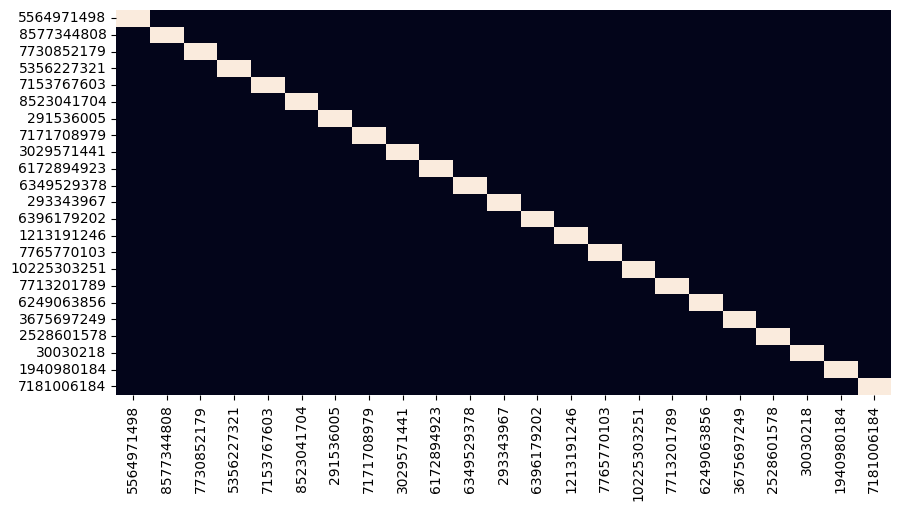

In [17]:
heatmap= distance_matrix.copy()
for col in heatmap.columns:
    heatmap[col]=heatmap[col].apply(lambda x: 
         0.3 if pd.isnull(x) else
         (0.7 if np.isinf(x) else 
          (0 if x!=0 else 1)) )
    
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heatmap, vmin=0 , vmax=1 , cbar=False, ax=ax)
plt.show()


In [18]:
# Create distance matrix
def calculate_distance_matrix(G, locations):
    matrix = np.zeros((len(locations), len(locations)))
    for i, (lat1, lon1) in enumerate(locations):
        for j, (lat2, lon2) in enumerate(locations):
            if i != j:
                matrix[i][j] = nx.shortest_path_length(G, 
                                                        ox.distance.nearest_nodes(G, lon1, lat1),
                                                        ox.distance.nearest_nodes(G, lon2, lat2),
                                                        weight='travel_time')
    return matrix
print("Distance Matrix:\n", distance_matrix)

Distance Matrix:
              5564971498   8577344808   7730852179   5356227321   7153767603   \
5564971498      0.000000   878.347467  1075.386601   871.599763  1049.417951   
8577344808    972.082285     0.000000   300.063560    74.098502   274.094910   
7730852179   1089.351689   264.181579     0.000000   254.070294    57.389943   
5356227321    963.647937    72.897248   291.629212     0.000000   265.660562   
7153767603   1078.020365   252.850255    57.389943   242.738970     0.000000   
8523041704   1297.756761   498.041601   401.143038   426.074279   413.448329   
291536005    1379.960829   492.133290   437.565543   456.787692   449.870833   
7171708979   1068.751213   243.581103   127.225189   233.469818    88.343730   
3029571441   1309.423953   461.261825   412.810231   425.916228   425.115522   
6172894923   1073.464749   145.024672   401.446023   175.480966   375.477373   
6349529378   1006.881575   613.239751   884.161222   658.196165   858.192572   
293343967    1667.7025

In [19]:
num_vehicles = 4
depot = 0
lst_nodes= dtf["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes)-1, "num_vehicles", num_vehicles)

start: 5564971498 total locations to visit 22 num_vehicles 4


In [20]:
manager = pywrapcp.RoutingIndexManager(len(locations), num_vehicles, depot)
routing = pywrapcp.RoutingModel(manager)
print(f"Number of locations: {len(locations)}")
print(f"Depot index: {depot}, Location: {locations[depot]}")


Number of locations: 23
Depot index: 0, Location: {'City': 'Nairobi', 'Facility': 'Kenyatta University Teaching, Referral and Research Hospital', 'Latitude': -1.1774485790025642, 'Longitude': 36.91542370190177}


In [22]:
def distance_callback(from_index, to_index):
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return int(distance_matrix.iat[from_node, to_node])

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)


In [23]:
def demand_callback(from_index):
    return 1  # Assuming no demand at the depot

demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
routing.AddDimensionWithVehicleCapacity(demand_callback_index, 0, [10] * num_vehicles, True, "Capacity")

True

In [24]:
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
solution = routing.SolveWithParameters(search_parameters)


In [25]:
if solution:
    for vehicle_id in range(num_vehicles):
        index = routing.Start(vehicle_id)
        route = []
        while not routing.IsEnd(index):
            route.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        print(f"Route for vehicle {vehicle_id}: {route}")
else:
    print("No solution found!")

Route for vehicle 0: [0]
Route for vehicle 1: [0, 1, 22, 9, 19, 21, 2, 4, 7, 14]
Route for vehicle 2: [0, 3, 6, 11, 12, 5, 13, 8, 20, 16]
Route for vehicle 3: [0, 15, 10, 17, 18]


In [26]:
print(lst_route)  # Check the structure of lst_route

[{'City': 'Nairobi', 'Facility': 'Kenyatta University Teaching, Referral and Research Hospital', 'Latitude': -1.1774485790025642, 'Longitude': 36.91542370190177}, {'City': 'Nairobi', 'Facility': 'Juja Road Hospital - Pangani', 'Latitude': -1.2680348377689903, 'Longitude': 36.838052719693735}, {'City': 'Nairobi', 'Facility': 'MP Shah Hospital', 'Latitude': -1.2634399950904192, 'Longitude': 36.81214011479204}, {'City': 'Nairobi', 'Facility': 'Guru Nanak Ramgarhia Sikh Hospital', 'Latitude': -1.2694019711454219, 'Longitude': 36.83249311479203}, {'City': 'Nairobi', 'Facility': 'Avenue Hospital Nairobi', 'Latitude': -1.2643867559801263, 'Longitude': 36.81791959944912}, {'City': 'Nairobi', 'Facility': 'Coptic Hospital-Main Hospital', 'Latitude': -1.297372573961115, 'Longitude': 36.797652614792014}, {'City': 'Nairobi', 'Facility': 'THE NAIROBI WEST HOSPITAL', 'Latitude': -1.3065158916286777, 'Longitude': 36.825902457396005}, {'City': 'Nairobi', 'Facility': 'Aga Khan University Hospital', 'Lat

In [28]:
def get_path_between_nodes(lst_route):
    # Step 1: Find nearest nodes for all locations in lst_route
    for loc in lst_route:
        loc['node'] = ox.distance.nearest_nodes(G, loc['Longitude'], loc['Latitude'])
        print(f"Nearest node for {loc['Facility']}: {loc['node']}")  # Debugging output

    lst_paths = []  # Initialize the list to store paths

    # Step 2: Generate paths between nodes
    for i in range(len(lst_route) - 1):
        src_node = lst_route[i]['node']  # Extract the node ID
        dest_node = lst_route[i + 1]['node']  # Extract the next node ID
        
        print(f"Checking path from {src_node} to {dest_node}")  # Debugging output
        
        if src_node in G.nodes and dest_node in G.nodes:
            try:
                path = nx.shortest_path(G, source=src_node, target=dest_node, weight='travel_time')
                lst_paths.append(path)
                print(f"Path found: {path}")  # Debugging output
            except nx.NetworkXNoPath:
                print(f"No path found between {src_node} and {dest_node}")
        else:
            print(f"Node {src_node} or {dest_node} not in graph.")
    
    return lst_paths  # Return the list of paths

In [ ]:
lst_route = [
    {'Facility': 'Kenyatta University Teaching Hospital', 'Latitude': -1.1774, 'Longitude': 36.9154},
    {'Facility': 'Juja Road Hospital - Pangani', 'Latitude': -1.2680, 'Longitude': 36.8381},
    {'Facility': 'MP Shah Hospital', 'Latitude': -1.2634399950904192, 'Longitude': 36.81214011479204},
    {'Facility': 'Guru Nanak Ramgarhia Sikh Hospital', 'Latitude': -1.2694019711454219, 'Longitude': 36.83249311479203},
    {'Facility': 'Avenue Hospital Nairobi', 'Latitude': -1.2643867559801263, 'Longitude': 36.81791959944912},
    {'Facility': 'Coptic Hospital-Main Hospital', 'Latitude': -1.297372573961115, 'Longitude': 36.797652614792014},
    {'Facility': 'THE NAIROBI WEST HOSPITAL', 'Latitude': -1.3065158916286777, 'Longitude': 36.825902457396005},
    {'Facility': 'Aga Khan University Hospital', 'Latitude': -1.2621481426039023, 'Longitude': 36.82381419972456},
    {'Facility': 'Kenyatta National Hospital', 'Latitude': -1.3020512957378605, 'Longitude': 36.80766429972455},
    {'Facility': 'Pumwani Maternity Hospital', 'Latitude': -1.280535486126181, 'Longitude': 36.84545584205309},
    {'Facility': 'Mama Lucy Kibaki Hospital', 'Latitude': -1.2739446428972168, 'Longitude': 36.89896914205308},
    {'Facility': 'Langata Hospital', 'Latitude': -1.327670792357127, 'Longitude': 36.78926854205308},
    {'Facility': 'The Nairobi Women\'s Hospital', 'Latitude': -1.2934860257680032, 'Longitude': 36.79609665739601},
    {'Facility': 'The Nairobi Hospital', 'Latitude': -1.2950305839789098, 'Longitude': 36.80390724980866},
    {'Facility': 'AAR Hospital', 'Latitude': -1.2375046786700936, 'Longitude': 36.8444370994491},
    {'Facility': 'Umoja Chiefs Camp', 'Latitude': -1.2823173958444931, 'Longitude': 36.9006500667569},
    {'Facility': 'Kahawa West Chiefs Camp', 'Latitude': -1.1848926273502338, 'Longitude': 36.90167342612349},
    {'Facility': 'Kasarani Chiefs Camp', 'Latitude': -1.2238072140456207, 'Longitude': 36.90248566532997},
    {'Facility': 'Ruiru Chiefs Camp', 'Latitude': -1.1632426124531046, 'Longitude': 36.97036149416567},
    {'Facility': 'Ngara Chiefs Office', 'Latitude': -1.2756388892985853, 'Longitude': 36.826035607658554},
    {'Facility': 'Kilimani Chiefs Camp', 'Latitude': -1.2907950681308624, 'Longitude': 36.81382832300148},
    {'Facility': 'Chiefs Office - Kitisuru', 'Latitude': -1.2624455721543675, 'Longitude': 36.74897192958406},
    {'Facility': 'Chiefs Office Eastleigh South', 'Latitude': -1.2870398918112156, 'Longitude': 36.851745906840655},



    
]

# Call the function to get paths
paths = get_path_between_nodes(lst_route)

# Print the paths
print(paths)

Nearest node for Kenyatta University Teaching Hospital: 5564971498
Nearest node for Juja Road Hospital - Pangani: 8577344808
Nearest node for MP Shah Hospital: 7730852179
Nearest node for Guru Nanak Ramgarhia Sikh Hospital: 5356227321
Nearest node for Avenue Hospital Nairobi: 7153767603
Nearest node for Coptic Hospital-Main Hospital: 8523041704
Nearest node for THE NAIROBI WEST HOSPITAL: 291536005
Nearest node for Aga Khan University Hospital: 7171708979
Nearest node for Kenyatta National Hospital: 3029571441
Nearest node for Pumwani Maternity Hospital: 6172894923
Nearest node for Mama Lucy Kibaki Hospital: 6349529378
Nearest node for Langata Hospital: 293343967
Nearest node for The Nairobi Women's Hospital: 6396179202
Nearest node for The Nairobi Hospital: 1213191246
Nearest node for AAR Hospital: 7765770103
Nearest node for Umoja Chiefs Camp: 10225303251
Nearest node for Kahawa West Chiefs Camp: 7713201789
Nearest node for Kasarani Chiefs Camp: 6249063856
Nearest node for Ruiru Chief

In [34]:
vehicles_data = {
    'id': ['Vehicle 1', 'Vehicle 2', 'Vehicle 3', 'Vehicle 4'],
    'lat': [-1.1774485790025642, -1.327670792357127, -1.2643867559801263, -1.2634399950904192],  # Replace with actual vehicle latitudes
    'lon': [36.91542370190177, 36.78926854205308, 36.81791959944912, 36.81214011479204]   # Replace with actual vehicle longitudes
}
vehicles_df = pd.DataFrame(vehicles_data)

In [35]:
def plot_routes_on_map(G, lst_paths, route_map, color="blue", weight=2, node_color="red"):
    for path in lst_paths:
        # Plot the route as a polyline
        route_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in path]
        folium.PolyLine(route_coords, color=color, weight=weight).add_to(route_map)
        
        # Add markers for each node along the route
        for node in path:
            folium.CircleMarker(
                location=(G.nodes[node]["y"], G.nodes[node]["x"]),
                radius=4,
                color=node_color,
                fill=True,
                fill_opacity=0.7,
            ).add_to(route_map)
    return route_map

# Step 1: Generate paths between nodes
paths = get_path_between_nodes(lst_route)

# Step 2: Initialize the Folium map
start = [-1.2500, 36.8000]  # Replace with your desired starting coordinates
map = folium.Map(location=start, tiles="cartodbpositron", zoom_start=12)

# Step 3: Plot the routes and nodes on the map
vehicles = [
    {'id': 'Vehicle 1', 'Latitude': -1.1774485790025642, 'Longitude': 36.91542370190177},
    {'id': 'Vehicle 2', 'Latitude': -1.327670792357127, 'Longitude': 36.78926854205308},
    {'id': 'Vehicle 3', 'Latitude': -1.2643867559801263, 'Longitude': 36.81791959944912},
    {'id': 'Vehicle 4', 'Latitude': -1.2634399950904192, 'Longitude': 36.81214011479204}
]

map = plot_routes_on_map(G, paths, route_map=map, color="blue", weight=1, node_color="black")

# Add vehicle markers to the map
for vehicle in vehicles:
    folium.Marker(
        location=[vehicle['Latitude'], vehicle['Longitude']],
        popup=vehicle['id'],
        icon=folium.Icon(color='red', icon='car')
    ).add_to(map)
# Step 4: Display the map
map


Nearest node for Kenyatta University Teaching Hospital: 5564971498
Nearest node for Juja Road Hospital - Pangani: 8577344808
Nearest node for MP Shah Hospital: 7730852179
Nearest node for Guru Nanak Ramgarhia Sikh Hospital: 5356227321
Nearest node for Avenue Hospital Nairobi: 7153767603
Nearest node for Coptic Hospital-Main Hospital: 8523041704
Nearest node for THE NAIROBI WEST HOSPITAL: 291536005
Nearest node for Aga Khan University Hospital: 7171708979
Nearest node for Kenyatta National Hospital: 3029571441
Nearest node for Pumwani Maternity Hospital: 6172894923
Nearest node for Mama Lucy Kibaki Hospital: 6349529378
Nearest node for Langata Hospital: 293343967
Nearest node for The Nairobi Women's Hospital: 6396179202
Nearest node for The Nairobi Hospital: 1213191246
Nearest node for AAR Hospital: 7765770103
Nearest node for Umoja Chiefs Camp: 10225303251
Nearest node for Kahawa West Chiefs Camp: 7713201789
Nearest node for Kasarani Chiefs Camp: 6249063856
Nearest node for Ruiru Chief

In [36]:
def df_animation_multiple_path(G, lst_paths, parallel=True):
    df=pd.DataFrame()
    for path in lst_paths :
        lst_start, lst_end = [] , []
        start_x, start_y = [] , []
        end_x, end_y = [], []
        lst_length, lst_time = [], [] 
        
        for a , b in zip (path[:-1], path[1:]):
            lst_start.append(a)
            lst_end.append(b)
            lst_length.append(round(G.edges[(a,b,0)]['length']))
            lst_time.append(round(G.edges[(a,b,0)]['travel_time']))
            start_x.append(G.nodes[a]['x'])
            start_y.append(G.nodes[a]['y'])
            end_x.append(G.nodes[b]['x'])
            end_y.append(G.nodes[b]['y'])
            
        tmp=pd.DataFrame(list(zip(lst_start, lst_end, start_x, start_y, end_x, end_y, lst_length, lst_time)), 
                         columns= ["start", "end", "start_x", "start_y", "end_x", "end_y", "length", "travel_time"])
        df=pd.concat([df,tmp], ignore_index=(not parallel))
        
    df=df.reset_index().rename(columns={"index":"id"})
    return df



In [38]:
df= pd.DataFrame()
tmp=df_animation_multiple_path(G, paths, parallel=False)
df=pd.concat([df, tmp], axis=0)
first_node, last_node= paths[0][0], paths[-1][-1]


In [39]:
# Start and end nodes DataFrames
df_start = df[df["start"] == first_node]
df_end = df[df["end"] == last_node]

# Create the initial scatter map
fig = px.scatter_mapbox(data_frame=df, lon="start_x", lat="start_y", zoom=15, width=900, height=700, animation_frame="id", mapbox_style="carto-positron")

# Configure the first trace
fig.data[0].marker = {"size": 12}

# Add dtf trace
fig.add_trace(px.scatter_mapbox(data_frame=dtf, lon="x", lat="y").data[0])
fig.data[1].marker = {"size": 10, "color": "black"}

# Add start nodes trace
fig.add_trace(px.scatter_mapbox(data_frame=df_start, lon="start_x", lat="start_y").data[0])
fig.data[2].marker = {"size": 15, "color": "red"}

# Add end nodes trace
fig.add_trace(px.scatter_mapbox(data_frame=df_end, lon="start_x", lat="start_y").data[0])
fig.data[3].marker = {"size": 15, "color": "green"}

# Add the line for the paths
fig.add_trace(px.line_mapbox(data_frame=df, lon="start_x", lat="start_y").data[0])

# Add vehicle markers to the map
for index, vehicle in vehicles_df.iterrows():
    fig.add_trace(px.scatter_mapbox(data_frame=pd.DataFrame([vehicle]), lon='lon', lat='lat').data[0])
    fig.data[-1].marker = {"size": 15, "color": "blue"}  # Customize vehicle marker color

# Show the final figure
fig.show()

